<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/pruebas-logistic_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

###  Librerías y catga de datos

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [84]:
data = pd.read_csv("https://drive.google.com/uc?id=1fMmyhTvj8RAJxMdFtI7zB5j8egQKx30O")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [89]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Visualizar Datos

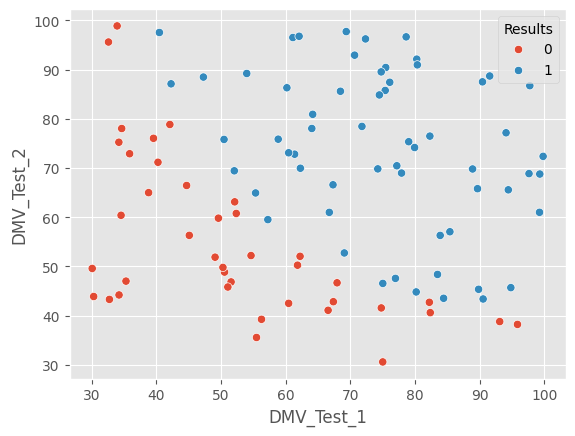

In [92]:
sns.scatterplot(x = 'DMV_Test_1', y = 'DMV_Test_2', hue = 'Results', data =data)

plt.show();

### Definimos de la función logística $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

### Cálculo de la Función de Coste  $J(\theta)$ y el Gradiente

En la regresión Logística debemos minimizar la función de coste

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Siendo el gradiente de esta función de coste:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [94]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [102]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -(1 / m) * sum(error)
    gradient = 1 / m *(np.dot(x.transpose(), (y_pred - y)))
    return cost , gradient

### Formamos matriz XX,vector y  theta_inicial

In [124]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

In [130]:
#mean_scores = np.mean(scores, axis=0)
#std_scores = np.std(scores, axis=0)
#scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
theta_init = np.zeros((cols + 1, 1))


In [131]:
X.shape,y.shape,theta_init.shape

((100, 3), (100, 1), (3, 1))

In [132]:
X[0:4,:],y[0:4,:],theta_init[0:4,:]

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ]]),
 array([[0],
        [0],
        [0],
        [1]]),
 array([[0.],
        [0.],
        [0.]]))

In [133]:
cost,gradient = compute_cost(theta_init, X, y)
print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization [0.69314718]
Gradient at initialization: [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### Gradiente Descendente

Minimizamos la función de coste $J(\theta)$  actualizando la siguiente ecuación (algoritmo del gradiente descendente) repitiendo hasta convergencia :  
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$    
 (actualizar simultaneamente $\theta_j$ para todo $j$)

In [135]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []

    for i in range(iterations):
        cost,gradient= compute_cost(theta, x, y)
        theta = theta - (alpha * gradient)
        if i % 1000 == 0:
            print("Iteration", i, "Cost:", cost)
        costs.append(cost)
    return theta, costs

In [136]:
theta_init

array([[0.],
       [0.],
       [0.]])

In [137]:
theta, costs = gradient_descent(X, y, theta_init, 0.0001, 20000)

Iteration 0 Cost: [0.69314718]
Iteration 1000 Cost: [0.62933389]
Iteration 2000 Cost: [0.62884748]
Iteration 3000 Cost: [0.62836191]
Iteration 4000 Cost: [0.62787718]
Iteration 5000 Cost: [0.62739328]
Iteration 6000 Cost: [0.62691022]
Iteration 7000 Cost: [0.62642798]
Iteration 8000 Cost: [0.62594658]
Iteration 9000 Cost: [0.62546601]
Iteration 10000 Cost: [0.62498627]
Iteration 11000 Cost: [0.62450735]
Iteration 12000 Cost: [0.62402926]
Iteration 13000 Cost: [0.623552]
Iteration 14000 Cost: [0.62307555]
Iteration 15000 Cost: [0.62259993]
Iteration 16000 Cost: [0.62212513]
Iteration 17000 Cost: [0.62165114]
Iteration 18000 Cost: [0.62117797]
Iteration 19000 Cost: [0.62070562]


In [138]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-0.13838573]
 [ 0.0113862 ]
 [ 0.00152735]]
Resulting cost: [0.62023456]


###  Convergencia de $J(\theta)$

Dibujamos $J(\theta)$ en relación al número de iteraciones del  gradiente descente:

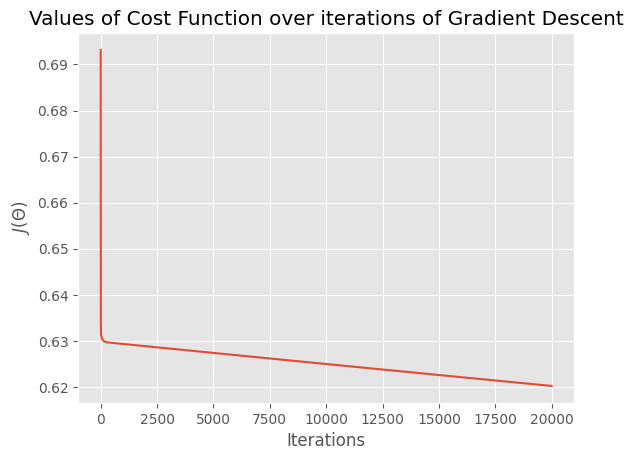

In [139]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Dibujemos la recta de decisión

$h_\theta(x) = \sigma(z)$, donde $\sigma$ es la función sigmoide y $z = \theta^Tx$

Cuando $h_\theta(x) \geq 0.5$ el modelo predice la clase "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predice clase "1"

Como, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ es la ecuación de la recta de decisión, tenemos que :

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

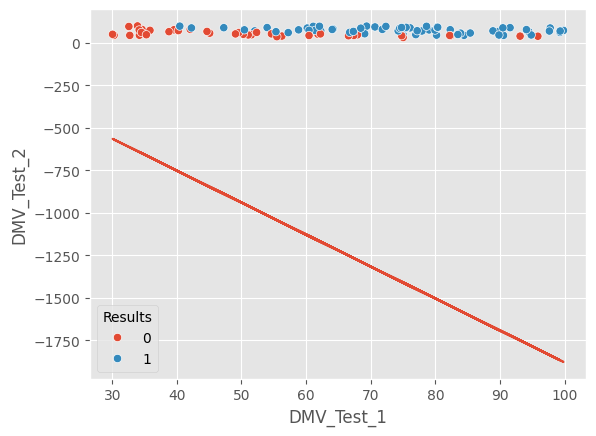

In [122]:
sns.scatterplot(x = 'DMV_Test_1', y = 'DMV_Test_2', hue = 'Results', data =data)
decision_boundary = -(theta[0] + (theta[1]/0.0001)*data['DMV_Test_1'])/(theta[2]/0.0001)
plt.plot(data['DMV_Test_1'], decision_boundary)

### Predicciones utilizando los valores $\theta$ encontrados

$h_\theta(x) = x\theta$

In [79]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [83]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 60 %


In [82]:
test = np.array([50,79])
#test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.64 probability of passing.
